## 이서범

[2025_12_12]_보스턴 집 가격 예측
- 필수
   * 교차검증
   * 데이터 누수 안됨!
   * 모델 : 회귀 모델,  배깅 앙상블-랜덤포레스트
- 기한 : 주말(12월 14일 일요일까지)

In [31]:
## ===========================================================
## [1-1] 모듈 로딩
## ===========================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## ML 모델 성능시표 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score


## CoW 활성화 : 복사와 공유 자동설정 기능 활성화
pd.options.mode.copy_on_write = True


# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [32]:
pd.read_csv('../DATA/housing.csv')

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [33]:
# housing_title_column.txt 파일 내용 그대로 리스트로 정의
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


reDF = pd.read_csv('../DATA/housing.csv', 
                    header=None,            # 데이터 파일에 컬럼 이름(헤더)이 포함되어 있지 않음을 명시
                    delim_whitespace=True,  # 필드(컬럼) 구분자로 공백(띄어쓰기)을 사용하도록 지정
                    names=column_names)     # 파일에 헤더가 없으므로 (header=None), 
                                            # 외부에서 미리 정의된 'column_names' 리스트를 사용하여

# 데이터 확인
display(reDF.head())


C:\Users\qjadl\AppData\Local\Temp\ipykernel_16228\2219351737.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reDF = pd.read_csv('../DATA/housing.csv',


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222.00000,18.70000,396.90000,5.33000,36.20000


In [34]:
reDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [35]:
reDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,356.67403,12.65306,22.53281
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,91.29486,7.14106,9.19710
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,0.32000,1.73000,5.00000
25%,0.08204,0.00000,5.19000,0.00000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,375.37750,6.95000,17.02500
50%,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,391.44000,11.36000,21.20000
75%,3.67708,12.50000,18.10000,0.00000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,396.22500,16.95500,25.00000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,396.90000,37.97000,50.00000


In [36]:
display(reDF.corr(numeric_only=True) )

corr_value = reDF.corr(numeric_only=True)['AGE']

reDF.corr(numeric_only=True) > 0.5


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00000,-0.20047,0.40658,-0.05589,0.42097,-0.21925,0.35273,-0.37967,0.62551,0.58276,0.28995,-0.38506,0.45562,-0.38830
ZN,-0.20047,1.00000,-0.53383,-0.04270,-0.51660,0.31199,-0.56954,0.66441,-0.31195,-0.31456,-0.39168,0.17552,-0.41299,0.36045
INDUS,0.40658,-0.53383,1.00000,0.06294,0.76365,-0.39168,0.64478,-0.70803,0.59513,0.72076,0.38325,-0.35698,0.60380,-0.48373
CHAS,-0.05589,-0.04270,0.06294,1.00000,0.09120,0.09125,0.08652,-0.09918,-0.00737,-0.03559,-0.12152,0.04879,-0.05393,0.17526
NOX,0.42097,-0.51660,0.76365,0.09120,1.00000,-0.30219,0.73147,-0.76923,0.61144,0.66802,0.18893,-0.38005,0.59088,-0.42732
RM,-0.21925,0.31199,-0.39168,0.09125,-0.30219,1.00000,-0.24026,0.20525,-0.20985,-0.29205,-0.35550,0.12807,-0.61381,0.69536
AGE,0.35273,-0.56954,0.64478,0.08652,0.73147,-0.24026,1.00000,-0.74788,0.45602,0.50646,0.26152,-0.27353,0.60234,-0.37695
DIS,-0.37967,0.66441,-0.70803,-0.09918,-0.76923,0.20525,-0.74788,1.00000,-0.49459,-0.53443,-0.23247,0.29151,-0.49700,0.24993
RAD,0.62551,-0.31195,0.59513,-0.00737,0.61144,-0.20985,0.45602,-0.49459,1.00000,0.91023,0.46474,-0.44441,0.48868,-0.38163
TAX,0.58276,-0.31456,0.72076,-0.03559,0.66802,-0.29205,0.50646,-0.53443,0.91023,1.00000,0.46085,-0.44181,0.54399,-0.46854


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,True,False,False,False,False,False,False,False,True,True,False,False,False,False
ZN,False,True,False,False,False,False,False,True,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,True,False,True,True,False,False,True,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,True,True,False,False,True,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,True
AGE,False,False,True,False,True,False,True,False,False,True,False,False,True,False
DIS,False,True,False,False,False,False,False,True,False,False,False,False,False,False
RAD,True,False,True,False,True,False,False,False,True,True,False,False,False,False
TAX,True,False,True,False,True,False,True,False,True,True,False,False,True,False


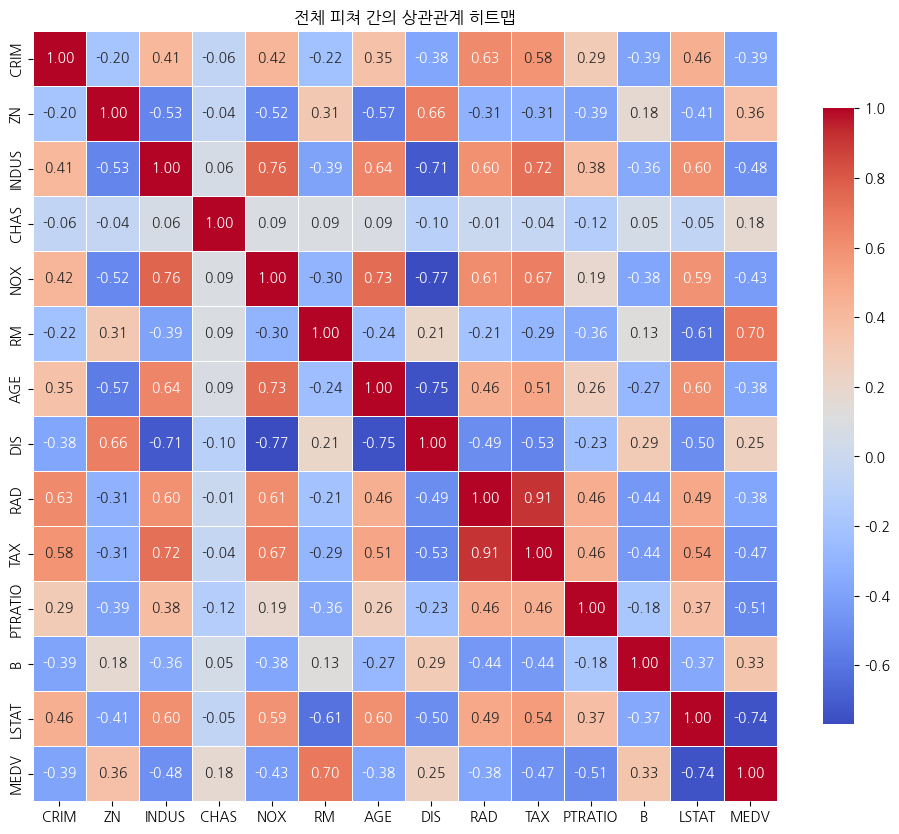

In [37]:
import seaborn as sns

# 히트맵으로 모든 피쳐 간의 상관관계 시각화
plt.figure(figsize=(12, 10))
sns.heatmap( reDF.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=.5, cbar_kws={'shrink': .8})
plt.title('전체 피쳐 간의 상관관계 히트맵')
plt.show()

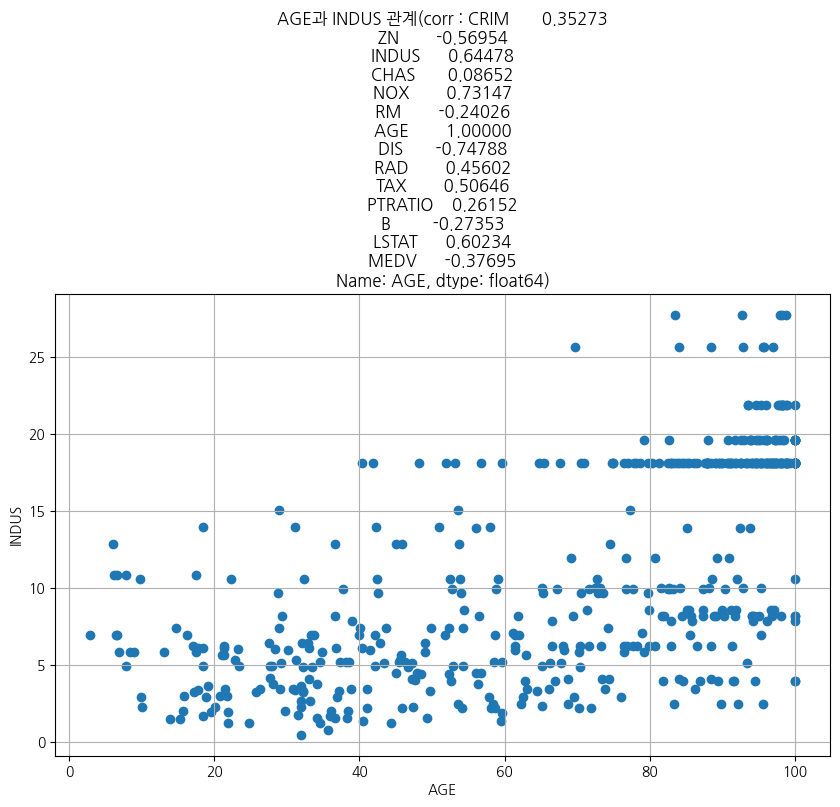

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(reDF.AGE,reDF.INDUS)

plt.xlabel('AGE')

plt.ylabel('INDUS')

plt.grid()

plt.title(f'AGE과 INDUS 관계(corr : {corr_value})')

plt.show()

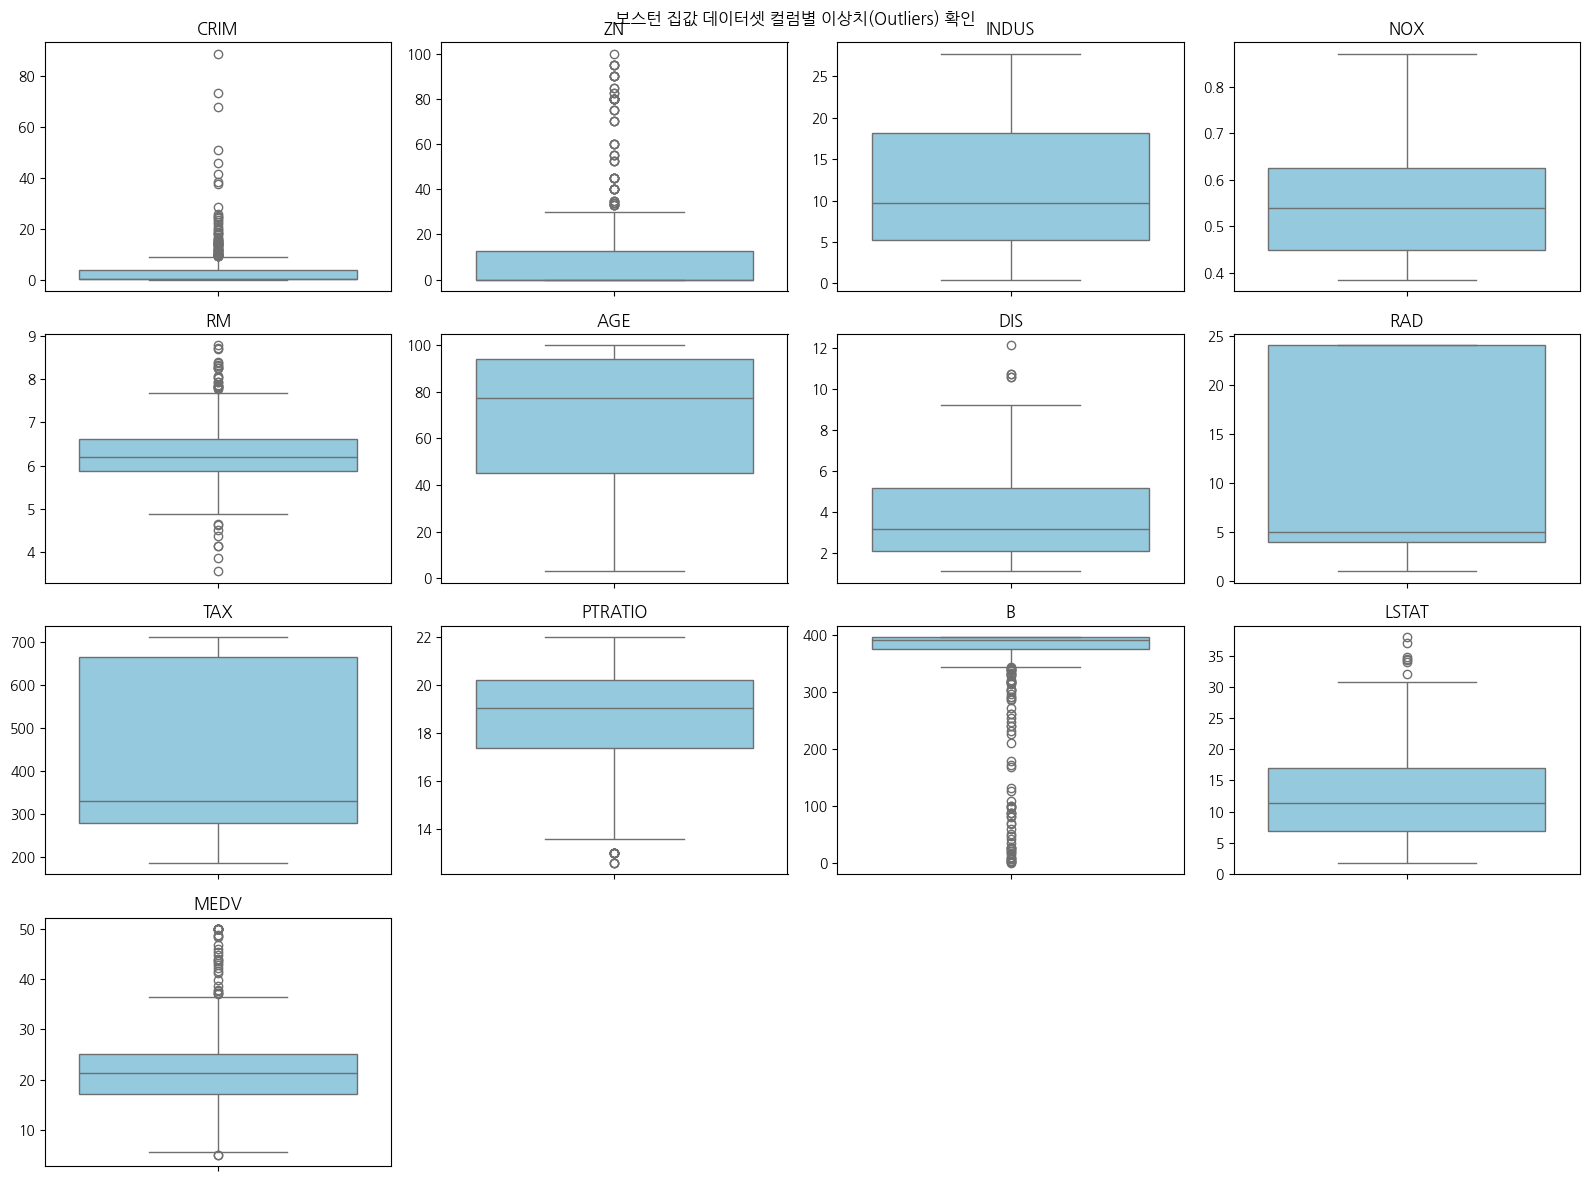

In [39]:
## chat 사용
import seaborn as sns
plot_cols = [col for col in reDF.columns if col != 'CHAS']

# 전체 피쳐 개수
n_features = len(plot_cols)

# 그래프 레이아웃 설정 (4열로 설정)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols # 필요한 행 개수 계산

# 캔버스 및 서브플롯 생성
plt.figure(figsize=(n_cols * 4, n_rows * 3)) # 전체 사이즈 조정

plt.suptitle('보스턴 집값 데이터셋 컬럼별 이상치(Outliers) 확인') # 전체 제목

for i, col in enumerate(plot_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # seaborn의 boxplot을 사용하여 시각화
    # 이상치는 박스 바깥의 점으로 표시됩니다.
    sns.boxplot(y=reDF[col], ax=ax, color='skyblue')
    
    ax.set_title(col, fontsize=12) # 각 서브플롯의 제목 (컬럼 이름)
    ax.set_ylabel('') # y축 레이블 제거 (깔끔하게)
    ax.tick_params(axis='y', labelsize=10) # y축 눈금 크기 조정

# 그래프 간격 조정
plt.tight_layout(rect=[0, 0, 1, 1.01]) # 전체 제목을 위한 공간 확보
plt.show()

In [40]:
## [2-1] 피쳐와 타겟 분리
featureDF = reDF[reDF.columns[:-1]]    
targetSR = reDF[reDF.columns[-1]]       

print(featureDF.shape, targetSR.shape)

(506, 13) (506,)


In [41]:
## [2-2] 학습용과 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    random_state=10 )  

print(f'[Train] x_train : {x_train.shape}, x_test : {x_test.shape}')     
print(f'[Test] y_train : {y_train.shape}, y_test : {y_test.shape}')     

[Train] x_train : (404, 13), x_test : (102, 13)
[Test] y_train : (404,), y_test : (102,)


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# [4-1] Pipeline 인스턴스 생성
# 1. StandardScaler: 수치형 데이터 스케일링
# 2. rf_reg: RandomForestRegressor (배깅 앙상블 회귀 모델)
pipeline = Pipeline(steps=[ 
    ('scaler', StandardScaler()),                 
    ('rf_reg', RandomForestRegressor(random_state=42)) 
])


In [43]:
from sklearn.model_selection import GridSearchCV, KFold

# [5-1] 튜닝할 하이퍼파라미터 범위 정의
param_dict = {
    'rf_reg__n_estimators': [100, 200, 300],   # : 트리의 개수
    'rf_reg__max_depth': [10, 20, None],       # : 트리의 최대 깊이
    'rf_reg__min_samples_split': [2, 5]        # : 노드를 분할하기 위한 최소 샘플 수
}

# [5-2] 회귀는 KFold 사용
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# [5-3] GridSearchCV 인스턴스 생성 및 학습
# scoring='neg_mean_squared_error' 사용: 값이 클수록(오차가 작을수록) 좋음
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict, 
                      cv=cv_folds, 
                      scoring='neg_mean_squared_error',
                      refit=True, # 최적 파라미터로 최종 모델 자동 학습
                      n_jobs=-1, verbose=1)

# 학습 시작 (X_train, y_train으로 튜닝)
gridCV.fit(x_train, y_train) 
# [5-4] 최적화 결과 출력
print("--- GridSearchCV 완료 ---")
print(f'최적의 파라미터: {gridCV.best_params_}')
best_mse = gridCV.best_score_
print(f'최고 교차 검증 평균 MSE (작을수록 좋음): {best_mse:.4f}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
--- GridSearchCV 완료 ---
최적의 파라미터: {'rf_reg__max_depth': None, 'rf_reg__min_samples_split': 2, 'rf_reg__n_estimators': 300}
최고 교차 검증 평균 MSE (작을수록 좋음): -11.1000


In [51]:
from sklearn.model_selection import GridSearchCV, KFold

# [5-1] 튜닝할 하이퍼파라미터 범위 정의
param_dict = {
    'rf_reg__n_estimators': [100, 200, 300],   # : 트리의 개수
    'rf_reg__max_depth': [10, 20, None],       # : 트리의 최대 깊이
    'rf_reg__min_samples_split': [2, 5]        # : 노드를 분할하기 위한 최소 샘플 수
}

# [5-2] 회귀는 KFold 사용
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# [5-3] GridSearchCV 인스턴스 생성 및 학습
# scoring='neg_mean_squared_error' 사용: 값이 클수록(오차가 작을수록) 좋음
gridCV = GridSearchCV(pipeline,
                      param_grid=param_dict, 
                      cv=cv_folds, 
                      scoring='r2',
                      refit=True, # 최적 파라미터로 최종 모델 자동 학습
                      n_jobs=-1, verbose=1)

# 학습 시작 (X_train, y_train으로 튜닝)
gridCV.fit(x_train, y_train) 
# [5-4] 최적화 결과 출력
print("--- GridSearchCV 완료 ---")
print(f'최적의 파라미터: {gridCV.best_params_}')
print(f'교차 검증 : {gridCV.best_score_:.4f}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
--- GridSearchCV 완료 ---
최적의 파라미터: {'rf_reg__max_depth': None, 'rf_reg__min_samples_split': 2, 'rf_reg__n_estimators': 300}
교차 검증 : 0.8509


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# [6-1] 최적 모델을 사용하여 테스트 데이터로 예측 수행
final_predictions = gridCV.predict(x_test) 
# print(final_predictions)


# [6-2] 최종 평가 지표 계산
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

# [6-3] 최종 결과 출력
print(f"\n==============================================")
print(f"--- 최종 테스트 데이터 성능 (일반화 성능) ---")
print(f"Test MSE (평균 제곱 오차): {final_mse:.4f}")
print(f"Test RMSE (루트 평균 제곱 오차): {final_rmse:.4f}")
print(f"Test R-squared (설명력): {final_r2:.4f}")
print(f"==============================================")


--- 최종 테스트 데이터 성능 (일반화 성능) ---
Test MSE (평균 제곱 오차): 15.7530
Test RMSE (루트 평균 제곱 오차): 3.9690
Test R-squared (설명력): 0.8494


[25.109333 29.434667 25.397667 28.855333 19.008333 15.347667 45.402333
 15.309333 20.668667 46.642    20.067    26.159    24.496333 32.070333
 32.325    44.541    24.584667 21.302    21.563333 17.075    31.052667
 15.111    21.495667 24.144667 36.586333 19.178667 18.522667 15.884667
 45.209333 14.603667 31.69     31.874333 24.402667 24.701333 16.360667
 20.304     9.048    34.376333 23.688667 22.843333 43.118333 25.013333
 10.675667 29.721    19.651333 27.700333 20.506667 20.311    48.437
 17.222    20.229333 14.228333 20.867333 45.011667 27.356333 32.779
 20.29     20.844667 20.133    30.683333 20.052667 20.901667 46.204333
 43.191    25.112    15.201333 23.364667  9.291667 27.338    39.379
 15.954667 27.041333 19.173333 37.583333 24.899333 17.664667 41.567667
  9.168667 19.196667 30.714333 20.051    23.773333 19.433    24.410333
 30.92     30.747333 24.145667 33.043667 25.552     8.354333 25.310333
 19.022333 22.720333 24.120667 19.498333 18.334667 25.334333 21.114333
 20.637667 20.3

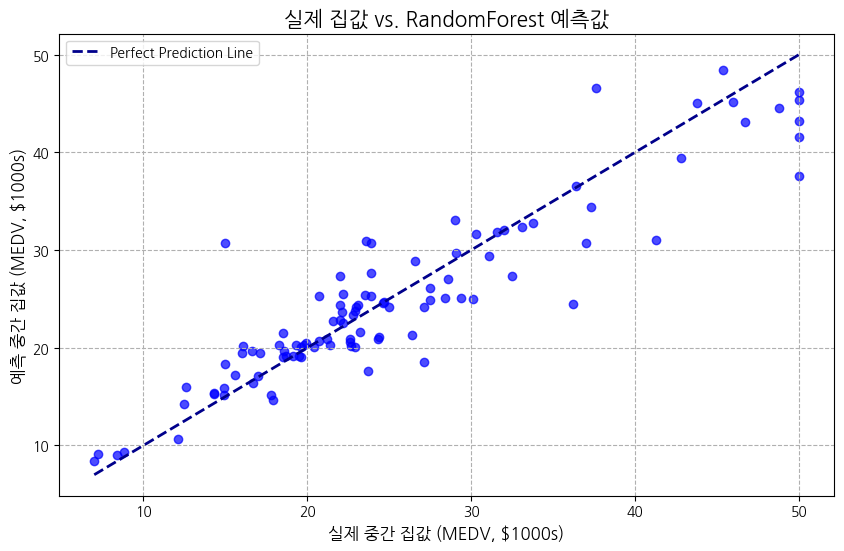

In [46]:
# ===================================================================
# final_predictions = gridCV.predict(X_test) 
# ===================================================================
# 테스트 데이터셋의 실제 값 (y_test)
y_true = y_test.values 
# 테스트 데이터셋에 대한 모델의 예측 값
y_pred = final_predictions 
print(y_pred)

# -------------------------------------------------------------------
# 실제 값 vs. 예측 값 산점도 (Scattering Plot)
# -------------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='b') # 실제 값 vs 예측 값 산점도

# y=x 선 (완벽한 예측을 의미)
max_val = max(y_true.max(), y_pred.max())
min_val = min(y_true.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 
         '--', color='darkblue', linewidth=2, label='Perfect Prediction Line')

plt.title('실제 집값 vs. RandomForest 예측값', fontsize=15)
plt.xlabel('실제 중간 집값 (MEDV, $1000s)', fontsize=12)
plt.ylabel('예측 중간 집값 (MEDV, $1000s)', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend()
plt.show()


In [47]:
# ===================================================================
# [가정] final_predictions와 y_test가 준비되어 있음
# ===================================================================

# 실제 값 (y_true)과 예측 값 (y_pred)을 정의
y_true = y_test.values
y_pred = final_predictions

# 1. 기준선 (y=x) 위에 있는 데이터 (과대평가) 조건: y_pred > y_true
# 예측값이 실제값보다 큰 경우의 인덱스를 찾습니다.
overestimate_mask = y_pred > y_true

# 2. 해당 데이터 포인트의 개수 계산
num_overestimated = np.sum(overestimate_mask)
total_samples = len(y_true)

print(f"총 테스트 샘플 개수: {total_samples}개")
print(f"모델이 과대평가한(선 위에 있는) 데이터 개수: {num_overestimated}개")
print(f"과대평가 비율: {(num_overestimated / total_samples) * 100:.2f}%")

총 테스트 샘플 개수: 102개
모델이 과대평가한(선 위에 있는) 데이터 개수: 56개
과대평가 비율: 54.90%


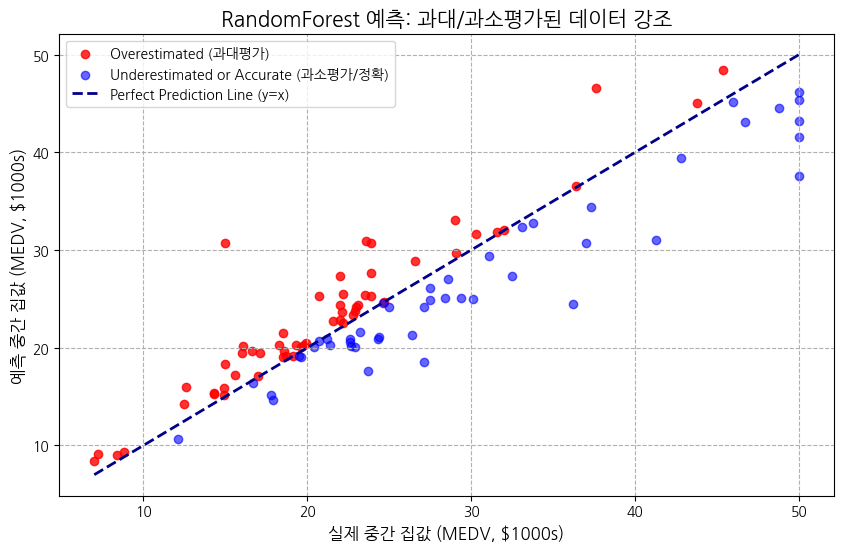

In [48]:
plt.figure(figsize=(10, 6))

# 1. 과대평가된 데이터 (선 위)
plt.scatter(y_true[overestimate_mask], y_pred[overestimate_mask], 
            alpha=0.8, color='red', label='Overestimated (과대평가)')

# 2. 과소평가되거나 정확한 데이터 (선 아래 또는 선상)
# NOT (y_pred > y_true) 이므로 y_pred <= y_true 입니다.
plt.scatter(y_true[~overestimate_mask], y_pred[~overestimate_mask], 
            alpha=0.6, color='b', label='Underestimated or Accurate (과소평가/정확)')


# y=x 선 (완벽한 예측 기준선)
max_val = max(y_true.max(), y_pred.max())
min_val = min(y_true.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 
         '--', color='darkblue', linewidth=2, label='Perfect Prediction Line (y=x)')

plt.title('RandomForest 예측: 과대/과소평가된 데이터 강조', fontsize=15)
plt.xlabel('실제 중간 집값 (MEDV, $1000s)', fontsize=12)
plt.ylabel('예측 중간 집값 (MEDV, $1000s)', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend()
plt.show()